<a href="https://colab.research.google.com/github/bhattacharyyadeep/Six-Sigma-/blob/main/Project_6210_INSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspc

In [ ]:
from pyspc import spc, xbar_rbar, rbar, rules
import numpy as np
#from scipy import stats
from scipy.stats import norm
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns; sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X = pd.read_csv('/content/StudentPerformanceFactors.csv', index_col=0)
print(X)

               Attendance Parental_Involvement Access_to_Resources  \
Hours_Studied                                                        
23                     84                  Low                High   
19                     64                  Low              Medium   
24                     98               Medium              Medium   
29                     89                  Low              Medium   
19                     92               Medium              Medium   
...                   ...                  ...                 ...   
25                     69                 High              Medium   
23                     76                 High              Medium   
20                     90               Medium                 Low   
10                     86                 High                High   
15                     67               Medium                 Low   

              Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
Hours_Studied  

In [ ]:
print(X.describe())

        Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
count  6607.000000   6607.00000      6607.000000        6607.000000   
mean     79.977448      7.02906        75.070531           1.493719   
std      11.547475      1.46812        14.399784           1.230570   
min      60.000000      4.00000        50.000000           0.000000   
25%      70.000000      6.00000        63.000000           1.000000   
50%      80.000000      7.00000        75.000000           1.000000   
75%      90.000000      8.00000        88.000000           2.000000   
max     100.000000     10.00000       100.000000           8.000000   

       Physical_Activity   Exam_Score  
count        6607.000000  6607.000000  
mean            2.967610    67.235659  
std             1.031231     3.890456  
min             0.000000    55.000000  
25%             2.000000    65.000000  
50%             3.000000    67.000000  
75%             4.000000    69.000000  
max             6.000000   101.000000  


In [ ]:
print(X.head())
print(X.tail())

               Attendance Parental_Involvement Access_to_Resources  \
Hours_Studied                                                        
23                     84                  Low                High   
19                     64                  Low              Medium   
24                     98               Medium              Medium   
29                     89                  Low              Medium   
19                     92               Medium              Medium   

              Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
Hours_Studied                                                            
23                                    No            7               73   
19                                    No            8               59   
24                                   Yes            7               91   
29                                   Yes            8               98   
19                                   Yes            6            

In [ ]:
X

,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
Hours_Studied,,,,,,,,,,,,,,,,,,,
23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68


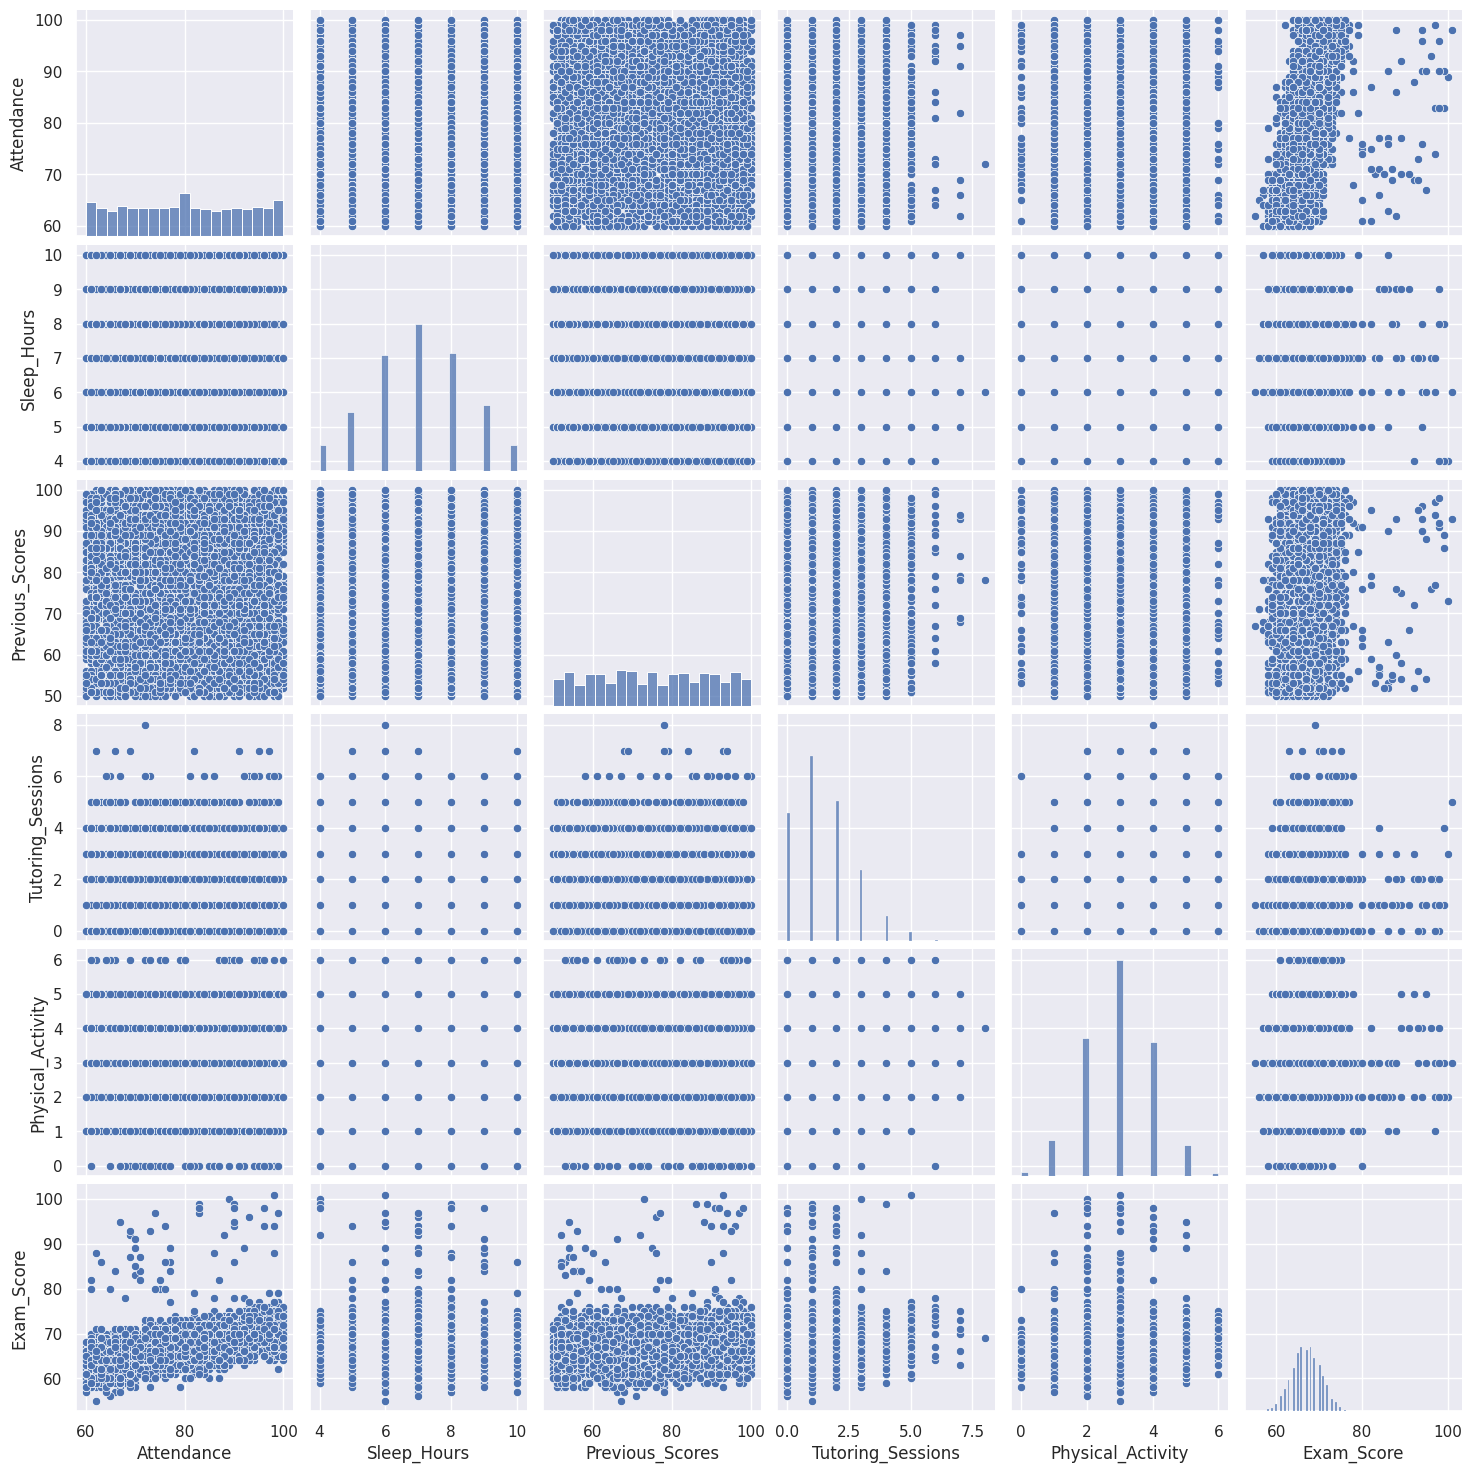

In [ ]:
#pairplot
sns.pairplot(X)

<Axes: ylabel='Exam_Score'>

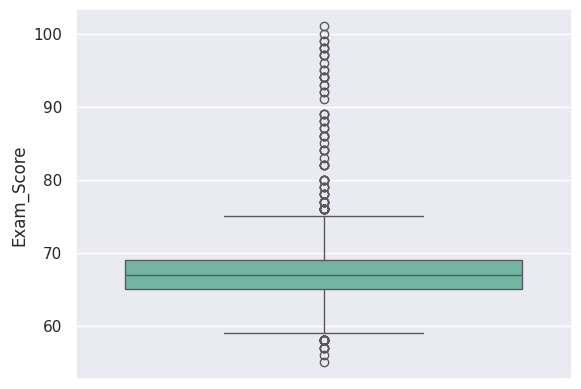

In [ ]:
Exam_score=X['Exam_Score']
sns.boxplot(data=Exam_score, orient="v", palette="Set2")

In [ ]:
m,n=X.shape
print('shape = ',m,n)
print('Columns are :', X.columns )

shape =  6607 19
Columns are : Index(['Attendance', 'Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores',
       'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


In [ ]:
X['Extracurricular_Activities']=X['Extracurricular_Activities'].apply(lambda x: 1 if x == 'Yes'  else 0)
X['Internet_Access']=X['Internet_Access'].apply(lambda x: 1 if x == 'Yes'  else 0)
X['Learning_Disabilities']=X['Learning_Disabilities'].apply(lambda x: 1 if x == 'Yes'  else 0)
X['School_Type']=X['School_Type'].apply(lambda x: 1 if x == 'Public'  else 0)
X['Gender']=X['Gender'].apply(lambda x: 1 if x == 'Female'  else 0)

In [ ]:
X

,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
Hours_Studied,,,,,,,,,,,,,,,,,,,
23,84,Low,High,0,7,73,Low,1,0,Low,Medium,1,Positive,3,0,High School,Near,0,67
19,64,Low,Medium,0,8,59,Low,1,2,Medium,Medium,1,Negative,4,0,College,Moderate,1,61
24,98,Medium,Medium,1,7,91,Medium,1,2,Medium,Medium,1,Neutral,4,0,Postgraduate,Near,0,74
29,89,Low,Medium,1,8,98,Medium,1,1,Medium,Medium,1,Negative,4,0,High School,Moderate,0,71
19,92,Medium,Medium,1,6,65,Medium,1,3,Medium,High,1,Neutral,4,0,College,Near,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,69,High,Medium,0,7,76,Medium,1,1,High,Medium,1,Positive,2,0,High School,Near,1,68
23,76,High,Medium,0,8,81,Medium,1,3,Low,High,1,Positive,2,0,High School,Near,1,69
20,90,Medium,Low,1,6,65,Low,1,3,Low,Medium,1,Negative,2,0,Postgraduate,Near,1,68


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

Columns=['Peer_Influence',
         'Parental_Involvement',
         'Access_to_Resources',
         'Motivation_Level',
         'Family_Income',
         'Teacher_Quality',
         'Parental_Education_Level',
         'Distance_from_Home'
         ]

# Transform the ordinal categorical data
for i in Columns:
  X[i] = label_encoder.fit_transform(X[i])


In [ ]:
X.head()

,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
Hours_Studied,,,,,,,,,,,,,,,,,,,
23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,0,67
19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,1,61
24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,0,74
29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,0,71
19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,1,70


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assume `data` is your DataFrame with numerical columns only
scaler = MinMaxScaler()

# Apply Min-Max scaling to all columns
normalized_data = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display the normalized data
print(normalized_data.head())

   Attendance  Parental_Involvement  Access_to_Resources  \
0       0.600                   0.5                  0.0   
1       0.100                   0.5                  1.0   
2       0.950                   1.0                  1.0   
3       0.725                   0.5                  1.0   
4       0.800                   1.0                  1.0   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                         0.0     0.500000             0.46               0.5   
1                         0.0     0.666667             0.18               0.5   
2                         1.0     0.500000             0.82               1.0   
3                         1.0     0.666667             0.96               1.0   
4                         1.0     0.333333             0.30               1.0   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0              1.0              0.000            0.5         0.666667   
1     

Index(['Attendance', 'Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores',
       'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


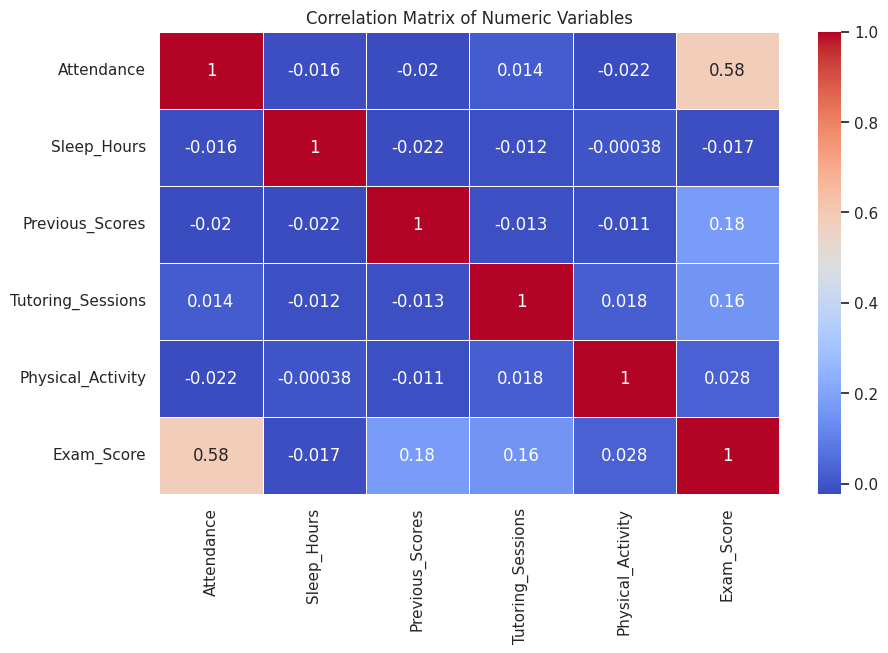

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/StudentPerformanceFactors.csv', index_col=0)
print(data.columns)


# Convert the relevant columns to numeric for correlation analysis
numeric_columns = ['Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

# Correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical using LabelEncoder
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define the feature matrix X and target variable y
X = data.drop('Exam_Score', axis=1)  # Drop the target variable
y = data['Exam_Score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 5 most important features
top_5_features = feature_importances.head(5)
print(top_5_features)


              Feature  Importance
0          Attendance    0.396521
5     Previous_Scores    0.133500
8   Tutoring_Sessions    0.056741
4         Sleep_Hours    0.050572
13  Physical_Activity    0.048738


Text(0.5, 1.0, 'Correlation Heatmap of Numeric Variables')

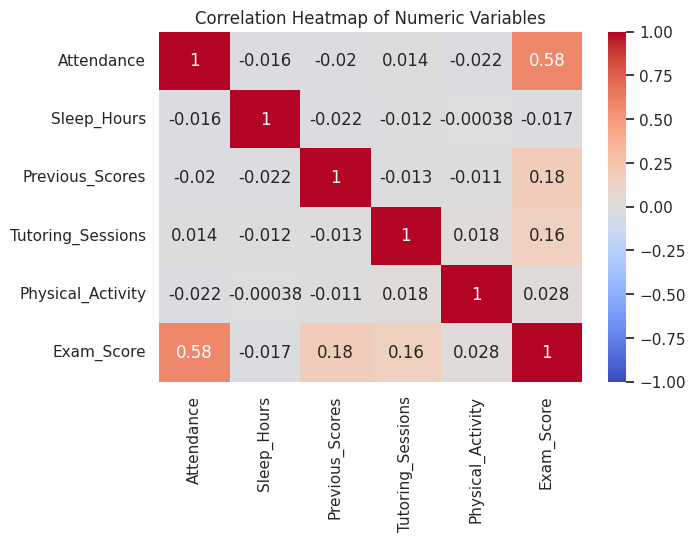

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/StudentPerformanceFactors.csv', index_col=0)

# Set the figure size for all plots
plt.figure(figsize=(15,10))

# 1. Correlation Heatmap for numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.subplot(2, 2, 1)
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Variables')


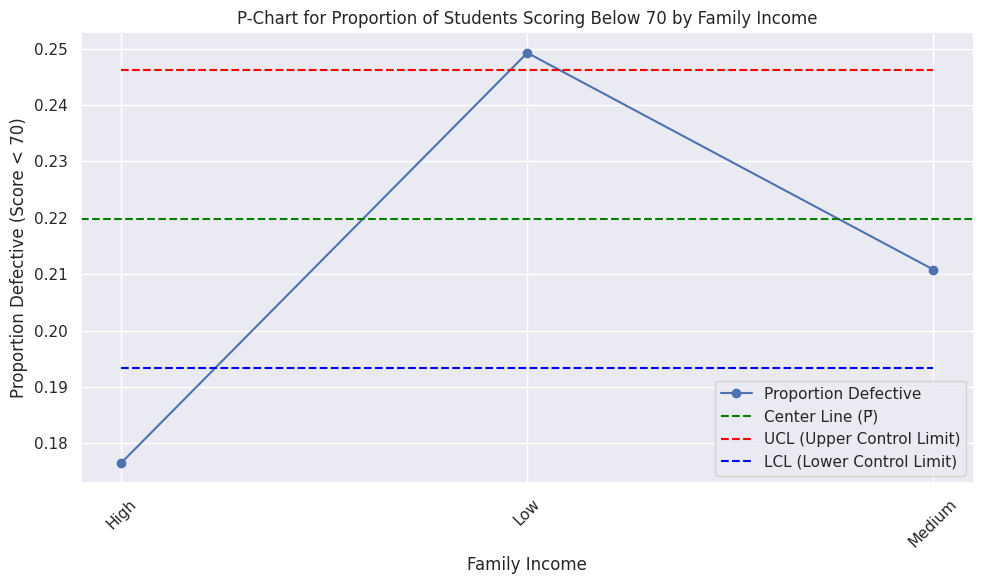

In [ ]:
# Define the threshold for "defective" (students scoring below 70)
threshold = 65

# Create a new column indicating if the Exam_Score is defective (below the threshold)
df['Defective'] = df['Exam_Score'] < threshold

# Group by Family Income and count the number of defectives and total students
grouped = df.groupby('Family_Income').agg(
    Defective_Count=('Defective', 'sum'),
    Total_Count=('Defective', 'size')
).reset_index()

# Calculate the proportion of defectives
grouped['Proportion_Defective'] = grouped['Defective_Count'] / grouped['Total_Count']

# Calculate overall proportion defective (P̅)
P_bar = grouped['Defective_Count'].sum() / grouped['Total_Count'].sum()

# Control limits
n = grouped['Total_Count'].mean()  # Average subgroup size
grouped['UCL'] = P_bar + 3 * np.sqrt((P_bar * (1 - P_bar)) / n)
grouped['LCL'] = P_bar - 3 * np.sqrt((P_bar * (1 - P_bar)) / n)
grouped['LCL'] = grouped['LCL'].apply(lambda x: max(x, 0))  # LCL can't be negative

# Plot the P-chart
plt.figure(figsize=(10, 6))
plt.plot(grouped['Family_Income'], grouped['Proportion_Defective'], marker='o', label='Proportion Defective')
plt.axhline(P_bar, color='green', linestyle='--', label='Center Line (P̅)')
plt.plot(grouped['Family_Income'], grouped['UCL'], color='red', linestyle='--', label='UCL (Upper Control Limit)')
plt.plot(grouped['Family_Income'], grouped['LCL'], color='blue', linestyle='--', label='LCL (Lower Control Limit)')

# Adding labels and title
plt.title('P-Chart for Proportion of Students Scoring Below 70 by Family Income')
plt.xlabel('Family Income')
plt.ylabel('Proportion Defective (Score < 70)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


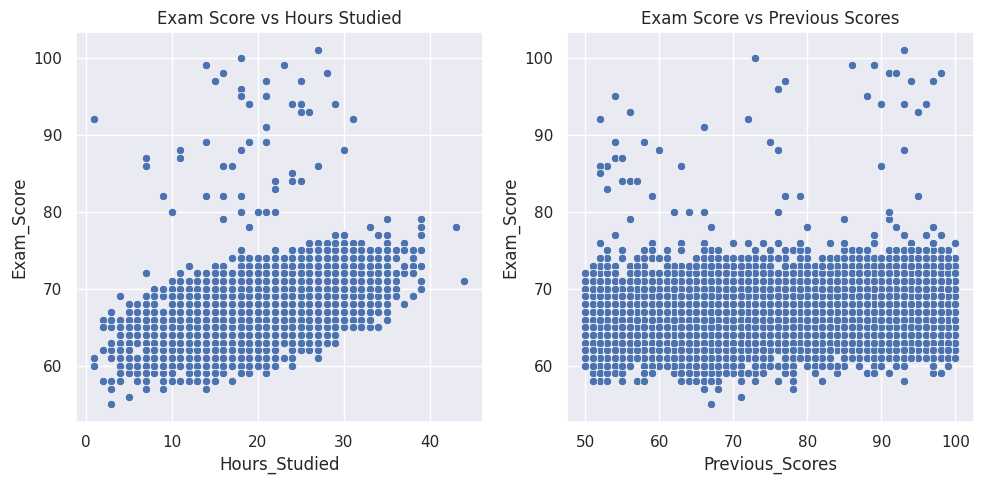

In [ ]:
# 3. Scatter plot for numeric columns
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Exam Score vs Hours Studied')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Previous_Scores', y='Exam_Score', data=df)
plt.title('Exam Score vs Previous Scores')

plt.tight_layout()
plt.show()

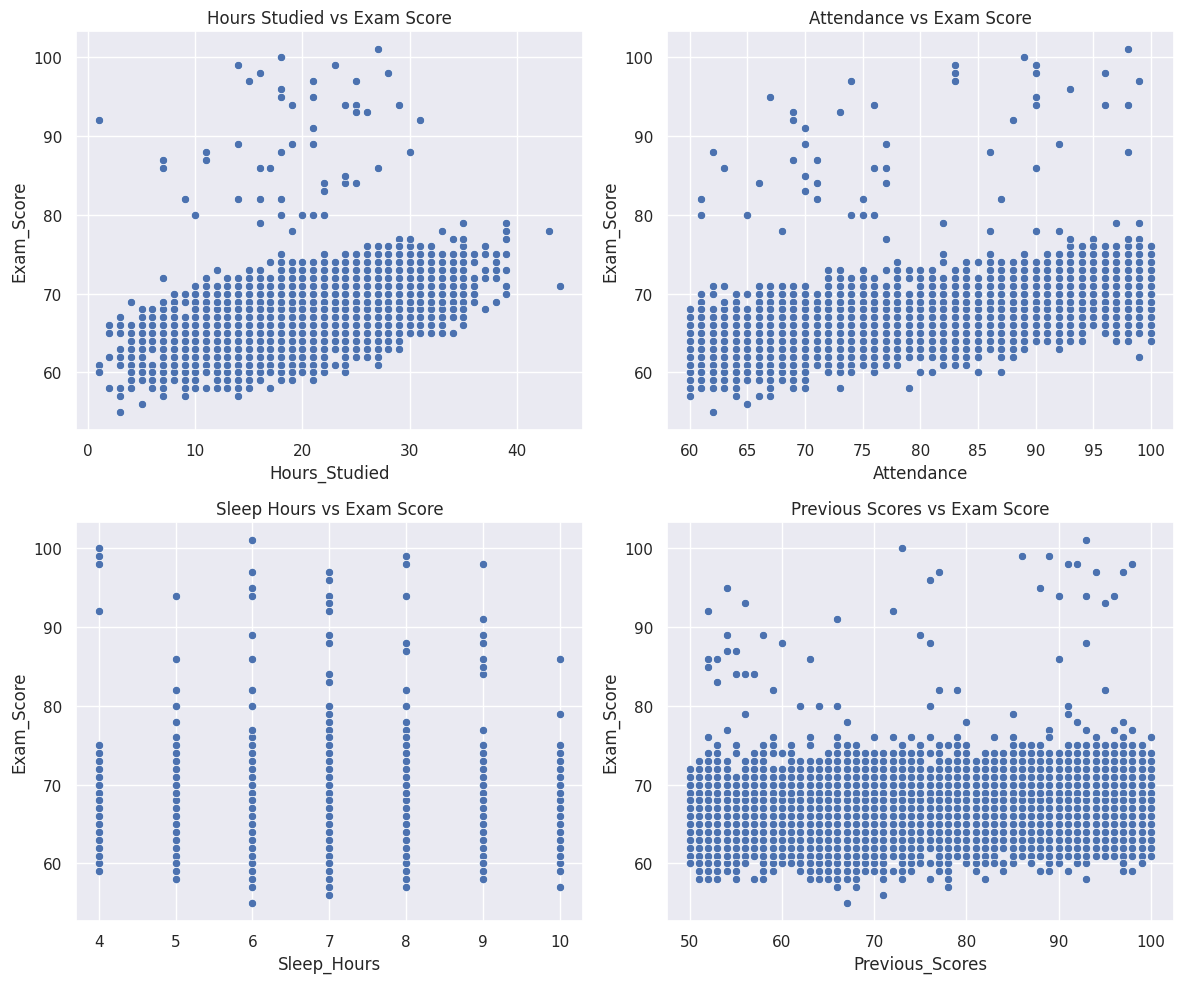

In [ ]:
# Scatter plots for continuous variables against Exam_Score
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Hours Studied vs Exam Score
sns.scatterplot(ax=axes[0, 0], x='Hours_Studied', y='Exam_Score', data=data)
axes[0, 0].set_title('Hours Studied vs Exam Score')

# Attendance vs Exam Score
sns.scatterplot(ax=axes[0, 1], x='Attendance', y='Exam_Score', data=data)
axes[0, 1].set_title('Attendance vs Exam Score')

# Sleep Hours vs Exam Score
sns.scatterplot(ax=axes[1, 0], x='Sleep_Hours', y='Exam_Score', data=data)
axes[1, 0].set_title('Sleep Hours vs Exam Score')

# Previous Scores vs Exam Score
sns.scatterplot(ax=axes[1, 1], x='Previous_Scores', y='Exam_Score', data=data)
axes[1, 1].set_title('Previous Scores vs Exam Score')

plt.tight_layout()
plt.show()


In [ ]:
!pip install seaborn matplotlib pandas

In [ ]:
print(data.columns[data.columns.duplicated()])

Index([], dtype='object')


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the dataset (make sure you've already loaded the data into a DataFrame)
# Assuming 'data' is your DataFrame

# Encode categorical columns
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define the feature matrix X and target variable y
X = data.drop('Exam_Score', axis=1)  # Features
y = data['Exam_Score']  # Target (Exam Score)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 5 most important features
top_5_features = feature_importances.head(5)
print("Top 5 factors affecting Exam Score:")
print(top_5_features)

# Set a target exam score (75%)
target_exam_score = 75

# Get current predictions on the test set
y_pred = model.predict(X_test)

# Calculate the difference from the target
score_diff = target_exam_score - y_pred

# Recommendations for improvement
recommendations = []

# Check for important features and suggest improvements
for feature in top_5_features['Feature']:
    avg_current_value = np.mean(X_test[feature])
    if avg_current_value < np.mean(X_train[feature]):
        recommendations.append(f"Increase {feature}: Current average is {avg_current_value:.2f}")

if len(recommendations) == 0:
    recommendations.append("Maintain current performance in key areas.")

# Output recommendations to reach the target score
print("\nRecommendations to improve Exam Score to 75%:")
for rec in recommendations:
    print(rec)



Top 5 factors affecting Exam Score:
              Feature  Importance
0          Attendance    0.396521
5     Previous_Scores    0.133500
8   Tutoring_Sessions    0.056741
4         Sleep_Hours    0.050572
13  Physical_Activity    0.048738

Recommendations to improve Exam Score to 75%:
Increase Attendance: Current average is 79.98
Increase Previous_Scores: Current average is 75.01
Increase Tutoring_Sessions: Current average is 1.47
Increase Sleep_Hours: Current average is 7.03
Increase Physical_Activity: Current average is 2.95


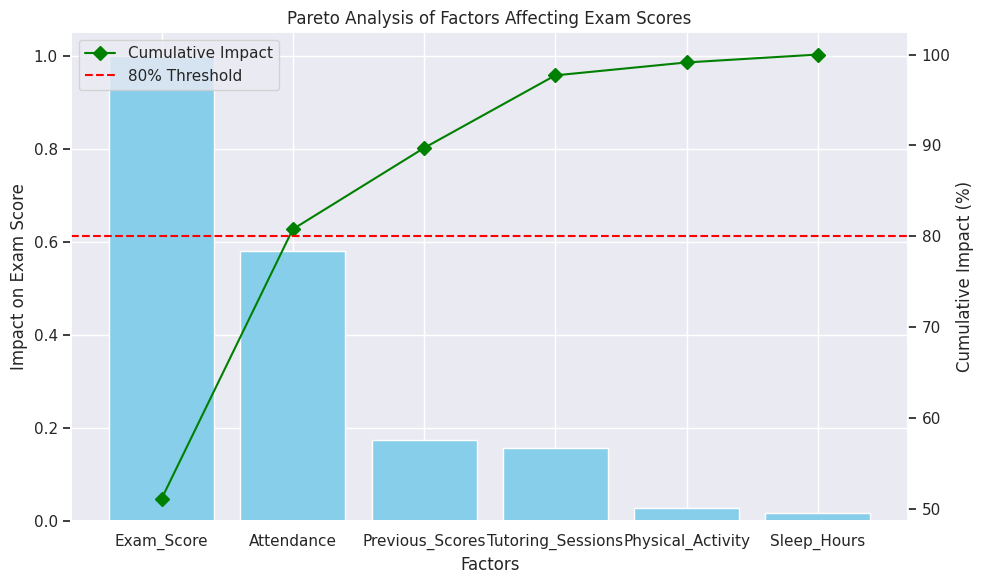

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/StudentPerformanceFactors.csv")  # Adjust this if dataset is loaded differently

# Step 1: Identify factors and calculate their average impact on 'Exam_Score'
# For simplicity, we assume numerical columns correlate directly with 'Exam_Score'
# You may customize this to focus on key factors affecting performance

factor_columns = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Motivation_Level',
                  'Tutoring_Sessions', 'Parental_Involvement', 'Family_Income',
                  'Teacher_Quality', 'Peer_Influence']  # Update based on dataset

# Compute the correlation with Exam_Score to understand impact
correlations = data[numeric_columns].corrwith(data['Exam_Score']).abs().sort_values(ascending=False)
pareto_data = correlations.to_frame(name='Impact').reset_index()
pareto_data.rename(columns={'index': 'Factor'}, inplace=True)

# Step 2: Calculate cumulative percentage for Pareto Analysis
pareto_data['Cumulative_Impact'] = pareto_data['Impact'].cumsum() / pareto_data['Impact'].sum() * 100

# Step 3: Plotting the Pareto chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(pareto_data['Factor'], pareto_data['Impact'], color='skyblue')
ax2 = ax.twinx()
ax2.plot(pareto_data['Factor'], pareto_data['Cumulative_Impact'], color='green', marker="D", ms=7)

# Labels and title
ax.set_ylabel('Impact on Exam Score')
ax2.set_ylabel('Cumulative Impact (%)')
ax.set_xlabel('Factors')
plt.title('Pareto Analysis of Factors Affecting Exam Scores')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show Pareto Threshold line (e.g., 80%)
plt.axhline(y=80, color='red', linestyle='--', label='80% Threshold')
plt.legend(['Cumulative Impact', '80% Threshold'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load your data (make sure 'data' is your DataFrame)

# Convert categorical columns to numerical using LabelEncoder
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define the feature matrix X and target variable y
X = data.drop('Exam_Score', axis=1)  # Features
y = data['Exam_Score']  # Target (Exam Score)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Get the top 10 most important features
top_10_features = feature_importances.head(10)
print("##### Top 10 features affecting Exam Score: #####")
print(top_10_features)

# Function to simulate changes in the dataset for a target increase
def improve_features(X_test, top_10_features, improvement_percentage=50):
    improvement_factor = 1 + (improvement_percentage / 100)  # Calculate the improvement factor
    for feature in top_10_features['Feature']:
        # Simulate improvement by increasing feature values by the improvement factor
        if X_test[feature].dtype in ['int64', 'float64']:  # Only apply to numeric features
            X_test[feature] = X_test[feature] * improvement_factor
            print(f"_____Increasing {feature} by {improvement_percentage}%. New factor: {improvement_factor:.2f}")
    return X_test

# Simulate improving the top 10 features by 50%
X_test_improved = improve_features(X_test.copy(), top_10_features, improvement_percentage=50)

# Re-run predictions with improved data
y_pred_improved = model.predict(X_test_improved)

# Compare original vs improved predictions
original_avg_score = np.mean(model.predict(X_test))
improved_avg_score = np.mean(y_pred_improved)

print(f"Original average score: {original_avg_score:.2f}")
print(f"Improved average score after modifying key features: {improved_avg_score:.2f}")

# Check if the improved score is closer to the target (75%)
if improved_avg_score >= 75:
    print("The changes increased the average exam score to 75% or above!")
else:
    print(f"The changes improved the score, but it is still below 75%. Current average: {improved_avg_score:.2f}")


##### Top 10 features affecting Exam Score: #####
                 Feature  Importance
1             Attendance    0.388646
0          Hours_Studied    0.242701
6        Previous_Scores    0.089897
9      Tutoring_Sessions    0.037560
5            Sleep_Hours    0.028549
14     Physical_Activity    0.027253
3    Access_to_Resources    0.026782
2   Parental_Involvement    0.025070
13        Peer_Influence    0.020814
10         Family_Income    0.018951
_____Increasing Attendance by 50%. New factor: 1.50
_____Increasing Hours_Studied by 50%. New factor: 1.50
_____Increasing Previous_Scores by 50%. New factor: 1.50
_____Increasing Tutoring_Sessions by 50%. New factor: 1.50
_____Increasing Sleep_Hours by 50%. New factor: 1.50
_____Increasing Physical_Activity by 50%. New factor: 1.50
_____Increasing Access_to_Resources by 50%. New factor: 1.50
_____Increasing Parental_Involvement by 50%. New factor: 1.50
_____Increasing Peer_Influence by 50%. New factor: 1.50
_____Increasing Family_Income

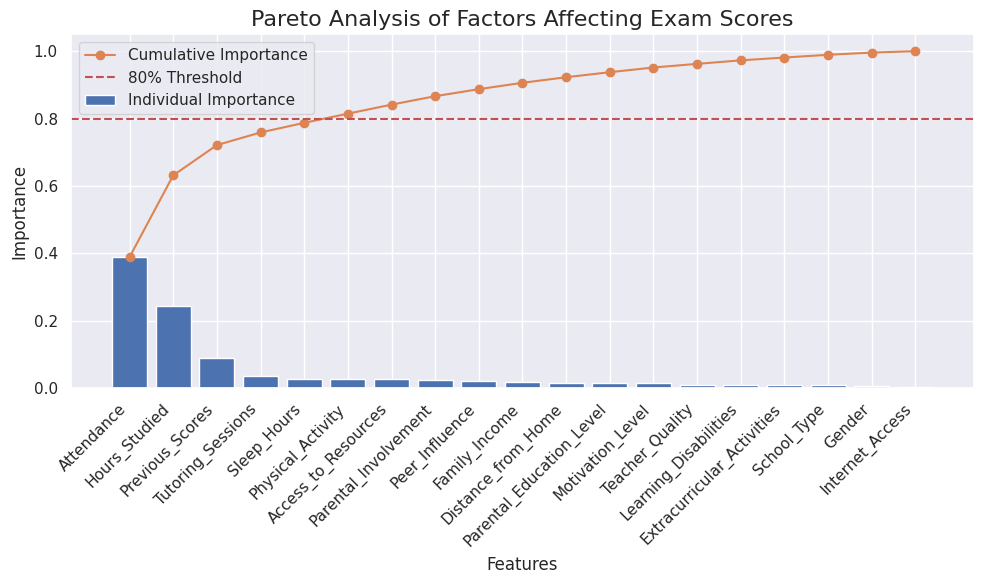

In [ ]:
import matplotlib.pyplot as plt

# Calculate cumulative importance
feature_importances['Cumulative Importance'] = feature_importances['Importance'].cumsum()

# Create the Pareto diagram
plt.figure(figsize=(10, 6))

# Bar chart for feature importances
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='C0', label='Individual Importance')

# Line chart for cumulative importance
plt.plot(feature_importances['Feature'], feature_importances['Cumulative Importance'], color='C1', marker='o', label='Cumulative Importance')

# Add a horizontal line at 80% (Pareto threshold)
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')

# Add titles and labels
plt.title('Pareto Analysis of Factors Affecting Exam Scores', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Calculate cumulative importance and cumulative percentage
feature_importances['Cumulative Importance'] = feature_importances['Importance'].cumsum()
feature_importances['Cumulative Percentage'] = feature_importances['Cumulative Importance'] * 100

# Convert importance to percentage for the frequency column
feature_importances['Frequency (%)'] = feature_importances['Importance'] * 100

# Rearrange and rename columns for clarity
table = feature_importances[['Feature', 'Frequency (%)', 'Cumulative Importance', 'Cumulative Percentage']]
table = table.rename(columns={
    'Cumulative Importance': 'Cumulative Frequency',
    'Cumulative Percentage': 'Cumulative (%)'
})

# Display the table
print("Feature Importance Table:")
table


Feature Importance Table:


,Feature,Frequency (%),Cumulative Frequency,Cumulative (%)
1,Attendance,38.864613,0.388646,38.864613
0,Hours_Studied,24.270134,0.631347,63.134747
6,Previous_Scores,8.989674,0.721244,72.124420
9,Tutoring_Sessions,3.756039,0.758805,75.880460
5,Sleep_Hours,2.854857,0.787353,78.735317
14,Physical_Activity,2.725338,0.814607,81.460654
3,Access_to_Resources,2.678181,0.841388,84.138836
2,Parental_Involvement,2.507009,0.866458,86.645845
13,Peer_Influence,2.081356,0.887272,88.727202
10,Family_Income,1.895085,0.906223,90.622287


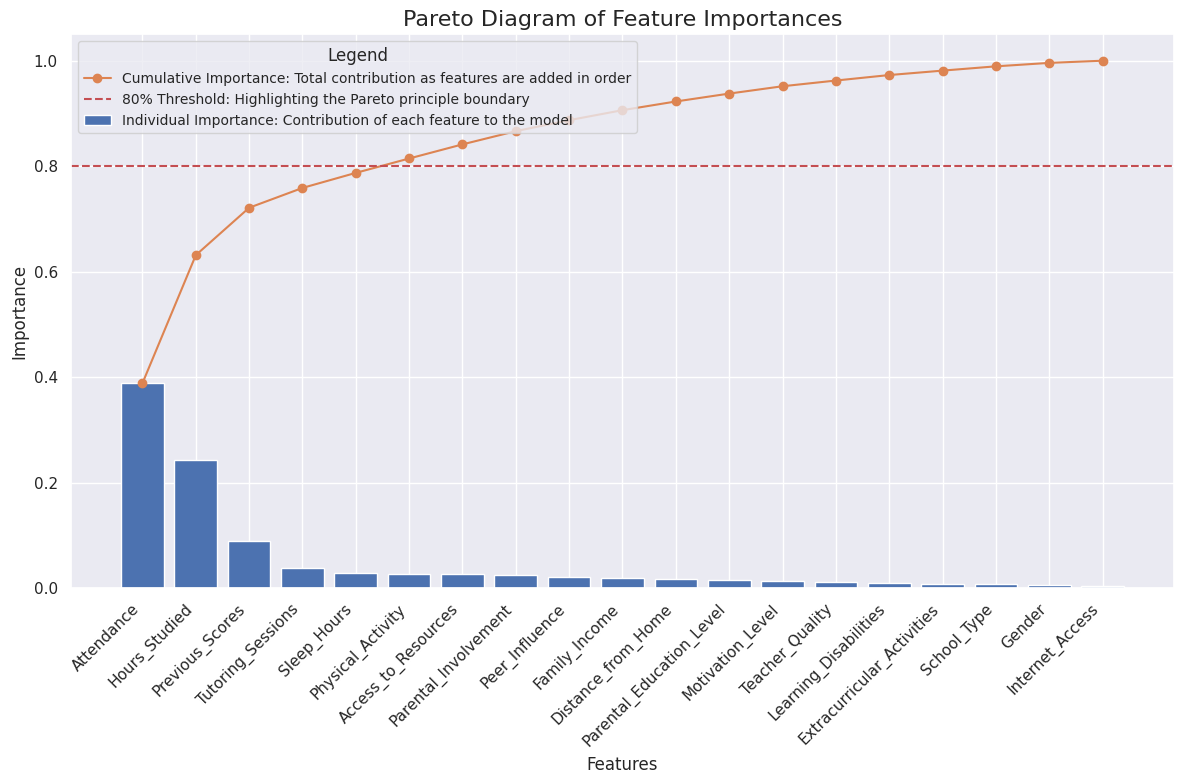

In [ ]:
import matplotlib.pyplot as plt

# Calculate cumulative importance
feature_importances['Cumulative Importance'] = feature_importances['Importance'].cumsum()

# Create the Pareto diagram
plt.figure(figsize=(12, 8))

# Bar chart for feature importances
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='C0', label='Individual Importance: Contribution of each feature to the model')

# Line chart for cumulative importance
plt.plot(feature_importances['Feature'], feature_importances['Cumulative Importance'], color='C1', marker='o', label='Cumulative Importance: Total contribution as features are added in order')

# Add a horizontal line at 80% (Pareto threshold)
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold: Highlighting the Pareto principle boundary')

# Add titles and labels
plt.title('Pareto Diagram of Feature Importances', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add a detailed legend
plt.legend(loc='upper left', fontsize=10, frameon=True, title="Legend", title_fontsize=12)

# Adjust layout for better viewing
plt.tight_layout()

# Show the plot
plt.show()


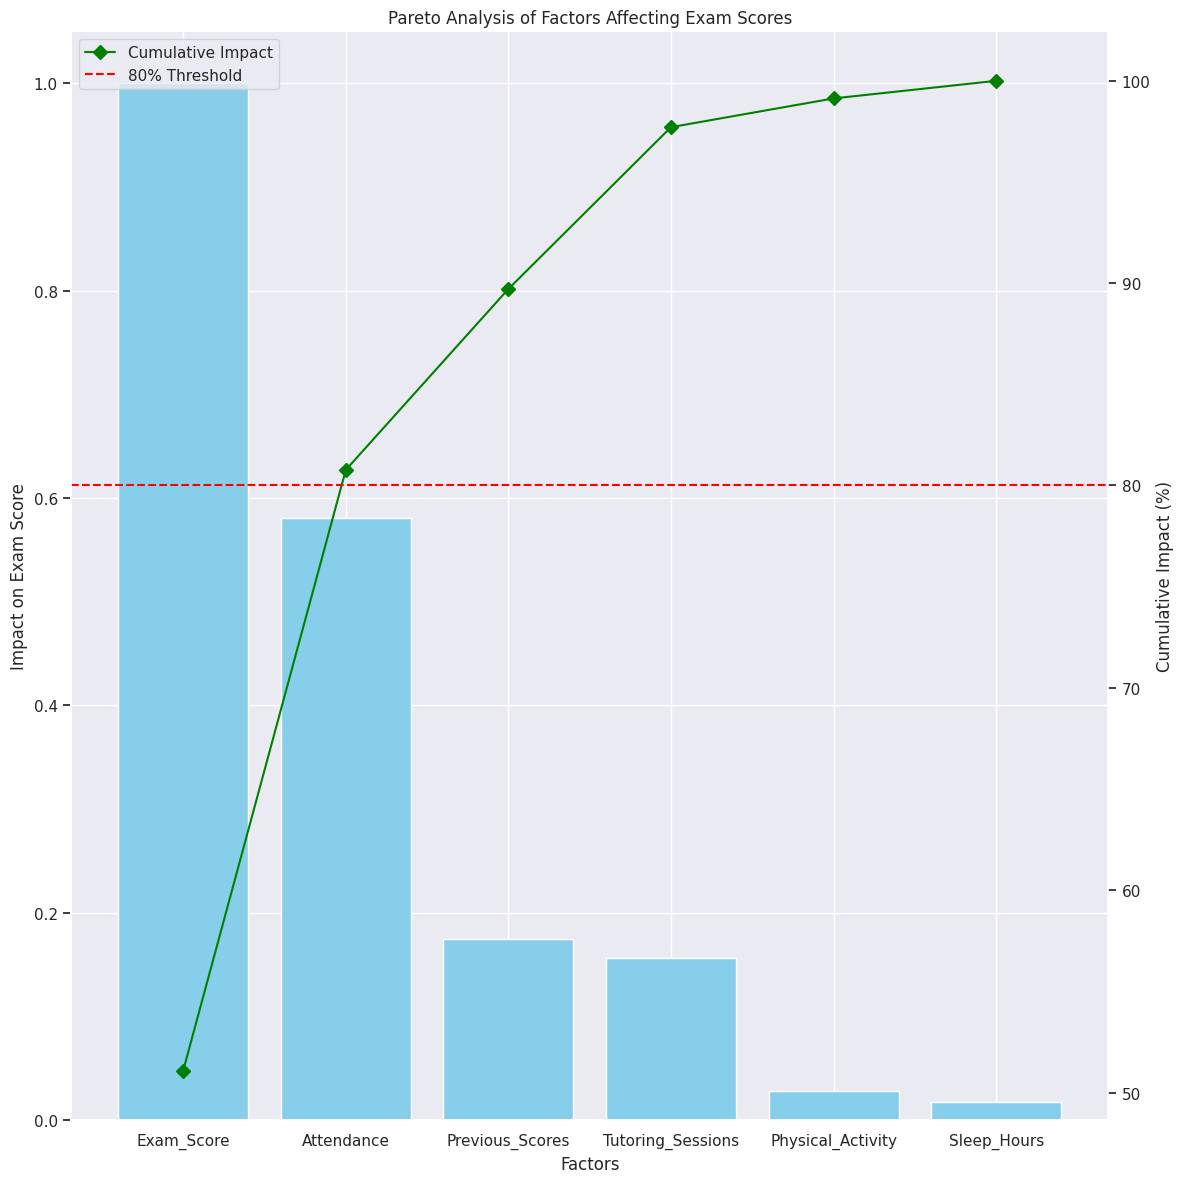

In [ ]:


factor_columns = importances

# Compute the correlation with Exam_Score to understand impact
correlations = data[numeric_columns].corrwith(data['Exam_Score']).abs().sort_values(ascending=False)
pareto_data = correlations.to_frame(name='Impact').reset_index()
pareto_data.rename(columns={'index': 'Factor'}, inplace=True)

# Step 2: Calculate cumulative percentage for Pareto Analysis
pareto_data['Cumulative_Impact'] = pareto_data['Impact'].cumsum() / pareto_data['Impact'].sum() * 100

# Step 3: Plotting the Pareto chart
fig, ax = plt.subplots(figsize=(12, 12))
ax.bar(pareto_data['Factor'], pareto_data['Impact'], color='skyblue')
ax2 = ax.twinx()
ax2.plot(pareto_data['Factor'], pareto_data['Cumulative_Impact'], color='green', marker="D", ms=7)

# Labels and title
ax.set_ylabel('Impact on Exam Score')
ax2.set_ylabel('Cumulative Impact (%)')
ax.set_xlabel('Factors')
plt.title('Pareto Analysis of Factors Affecting Exam Scores')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show Pareto Threshold line (e.g., 80%)
plt.axhline(y=80, color='red', linestyle='--', label='80% Threshold')
plt.legend(['Cumulative Impact', '80% Threshold'], loc='upper left')

plt.tight_layout()
plt.show()


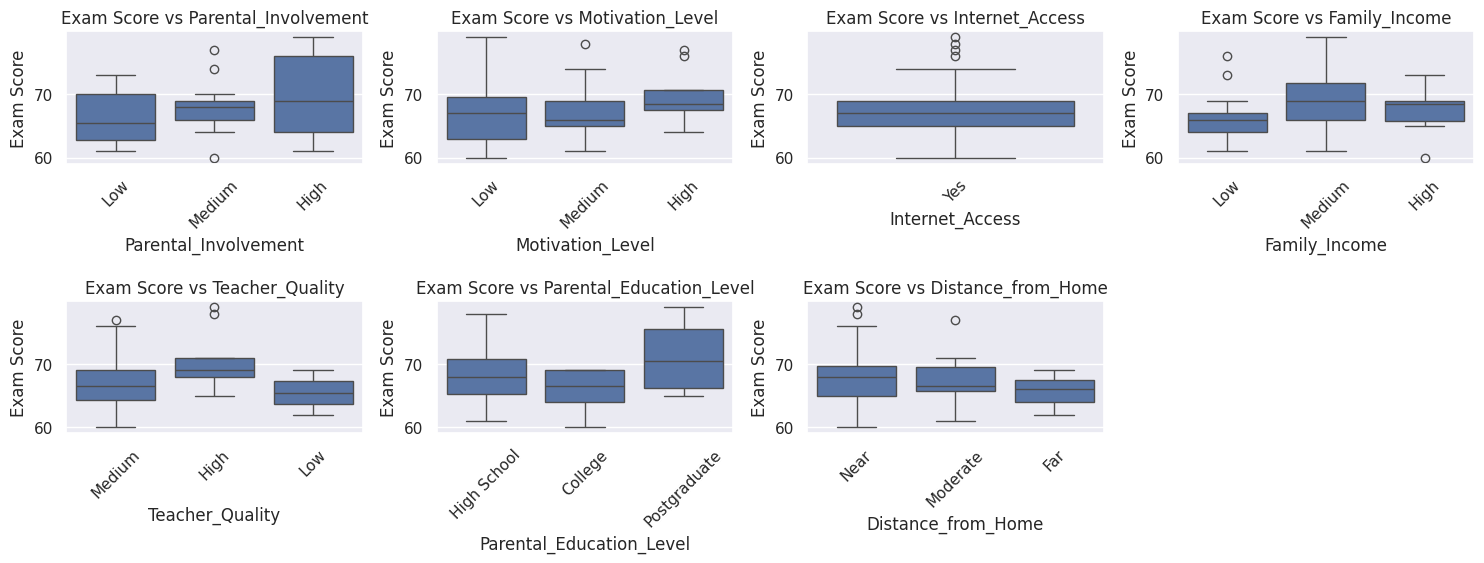

In [ ]:
# Create boxplots for Exam_Score against each categorical parameter
df = pd.read_csv('/content/StudentPerformanceFactors.csv', index_col=0)
df = df.loc[:, ~df.columns.duplicated()]  # Remove duplicate columns, if any
df = df[~df.index.duplicated()]  # Remove duplicate indices, if any



# Define categorical columns to plot against Exam_Score
categorical_columns = [
    'Parental_Involvement', 'Motivation_Level', 'Internet_Access',
    'Family_Income', 'Teacher_Quality', 'Parental_Education_Level',
    'Distance_from_Home',
]




# Create boxplots for Exam_Score against each categorical variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)  # Adjusted for 3 rows and 3 columns
    sns.boxplot(x=df[column], y=df['Exam_Score'])
    plt.title(f'Exam Score vs {column}')
    plt.xlabel(column)
    plt.ylabel('Exam Score')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [ ]:
!pip install graphviz

In [ ]:
from graphviz import Digraph

# Create a Digraph object
flowchart = Digraph(format="png")
flowchart.attr(rankdir='TB', size='10')

# Define Phase
flowchart.node('D', 'Define Phase', shape='box', style='filled', fillcolor='#99ccff')
flowchart.node('D1', 'Identify Problem')
flowchart.node('D2', 'Set Objective')
flowchart.node('D3', 'Identify Stakeholders')
flowchart.node('D4', 'Establish CTQ Parameters')
flowchart.node('D5', 'Create Project Charter')

# Measure Phase
flowchart.node('M', 'Measure Phase', shape='box', style='filled', fillcolor='#ffcc99')
flowchart.node('M1', 'Collect Data')
flowchart.node('M2', 'Validate Data Collection')
flowchart.node('M3', 'Establish Baseline Metrics')
flowchart.node('M4', 'Define Measurement Tools')

# Analyze Phase
flowchart.node('A', 'Analyze Phase', shape='box', style='filled', fillcolor='#99ff99')
flowchart.node('A1', 'Perform Root Cause Analysis')
flowchart.node('A2', 'Analyze Key Factors')
flowchart.node('A3', 'Identify Gaps')
flowchart.node('A4', 'Prioritize Issues')

# Improve Phase
flowchart.node('I', 'Improve Phase', shape='box', style='filled', fillcolor='#ff9966')
flowchart.node('I1', 'Develop Solutions')
flowchart.node('I2', 'Implement Pilot Solutions')
flowchart.node('I3', 'Monitor Pilot Performance')
flowchart.node('I4', 'Refine Solutions')

# Control Phase
flowchart.node('C', 'Control Phase', shape='box', style='filled', fillcolor='#66ccff')
flowchart.node('C1', 'Implement Full-Scale Solutions')
flowchart.node('C2', 'Monitor Progress')
flowchart.node('C3', 'Standardize Processes')
flowchart.node('C4', 'Sustain Improvements')
flowchart.node('C5', 'Celebrate Success')

# Connecting the Phases and Steps with proper edge pairs
flowchart.edge('D', 'D1')
flowchart.edge('D1', 'D2')
flowchart.edge('D2', 'D3')
flowchart.edge('D3', 'D4')
flowchart.edge('D4', 'D5')
flowchart.edge('D5', 'M')

flowchart.edge('M', 'M1')
flowchart.edge('M1', 'M2')
flowchart.edge('M2', 'M3')
flowchart.edge('M3', 'M4')
flowchart.edge('M4', 'A')

flowchart.edge('A', 'A1')
flowchart.edge('A1', 'A2')
flowchart.edge('A2', 'A3')
flowchart.edge('A3', 'A4')
flowchart.edge('A4', 'I')

flowchart.edge('I', 'I1')
flowchart.edge('I1', 'I2')
flowchart.edge('I2', 'I3')
flowchart.edge('I3', 'I4')
flowchart.edge('I4', 'C')

flowchart.edge('C', 'C1')
flowchart.edge('C1', 'C2')
flowchart.edge('C2', 'C3')
flowchart.edge('C3', 'C4')
flowchart.edge('C4', 'C5')

# Render and save the flowchart
flowchart.render('/content/sample_data/Six_Sigma_DMAIC_flowchart_fixed')

print("Flowchart generated and saved!")


Flowchart generated and saved!
